# Carga de datos numéricos e imágenes

En este notebook nos vamos a encargar de cargar y guardar los datos numéricos e imágenes y guardarlos en Drive para luego usarlos en nuestros modelos.

Descargamos el dataset.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2020-06-28 15:56:14--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [    <=>             ]  54.19M  3.02MB/s    in 18s     

2020-06-28 15:56:33 (2.98 MB/s) - ‘airbnb-listings.csv’ saved [56826824]



Comprobamos que el fichero airbnb-listings.csv se ha descargado.

In [40]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jun 28 15:07 .
drwxr-xr-x 1 root root 4.0K Jun 28 15:01 ..
-rw-r--r-- 1 root root  55M Jun 28 15:56 airbnb-listings.csv
drwxr-xr-x 1 root root 4.0K Jun 25 17:02 .config
drwxr-xr-x 1 root root 4.0K Jun 17 16:18 sample_data


Cargamos el fichero a un dataset con pandas.

In [41]:
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,12768616,https://www.airbnb.com/rooms/12768616,20170407214050,2017-04-08,Ramblas Studio D,"Unique apartment in vibrant neighborhoods, car...",Centrally located in the atmospheric Gothic Qu...,"Unique apartment in vibrant neighborhoods, car...",none,Located on the edge of the Gothic Quarter of B...,NaN,The nearest station is Place de Catalunya a fe...,NaN,NaN,No pets or smoking allowed.,https://a0.muscache.com/im/pictures/cffe393a-0...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/cffe393a-0...,54310958,https://www.airbnb.com/users/show/54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,99.0,NaN,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,L'Antiga Esquerra de l'Eixample,207.0,207.0,"email,phone,reviews,jumio","El Gòtic, Barcelona, Catalunya 08002, Spain",El Gòtic,el Barri Gòtic,Ciutat Vella,Barcelona,Catalunya,...,2,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,349.0,NaN,NaN,NaN,NaN,1,0,2,1125,a week ago,NaN,2,2,2,2,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,92,NaN,"41.3838872822,2.17180232785","Host Has Profile Pic,Host Identity Verified,Is..."
1,1629146,https://www.airbnb.com/rooms/1629146,20170407214050,2017-04-08,"Design, art & vintage / old city","If you're looking for a cool, spacious, light,...",The apartment is very comfortable and very tas...,"If you're looking for a cool, spacious, light,...",none,• A major advantage of this apartment is its l...,• Possibility of offering Premium Services suc...,• Nearest metro station is 1 min walk (Sant A...,Here's a list of of things we provide to our g...,==============================================...,* NO parties are allowed * NO noise on the st...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ea919e56-a...,8658841,https://www.airbnb.com/users/show/8658841,Olga & Co.,2013-09-05,"Barcelona, Catalonia, Spain","World traveller, currently living and working ...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/d67fdad1-e...,https://a0.muscache.com/im/pictures/d67fdad1-e...,El Raval,2.0,2.0,"email,phone,reviews,jumio","El Raval, Barcelona, Catalonia 08001, Spain",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,...,6,1.0,2.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,165.0,NaN,NaN,150.0,60.0,4,20,3,30,2 days ago,NaN,5,10,22,80,2017-04-08,110,2013-10-19,2017-03-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,strict,1,2.60,"41.3826627171,2.16755841626","Host Has Profile Pic,Host Identity Ve

Comprobamos el tamaño del dataset.

In [42]:
data.shape

(14001, 89)

Lo primero que haremos será dividir el dataset entre train, validation y test, para evitar data leakage.

In [43]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.25, shuffle=True, random_state=0)
df_train, df_validation = train_test_split(df_train, test_size=0.1, shuffle=True, random_state=0)
print("Muestras de train: {}".format(df_train.shape[0]))
print("Muestras de test: {}".format(df_test.shape[0]))
print("Muestras de validación: {}".format(df_validation.shape[0]))

Muestras de train: 9450
Muestras de test: 3501
Muestras de validación: 1050


Analizamos las columnas del dataset.

<ul style="color:ROYALBLUE">
    <li><b>ID: </b>Es el código que utiliza la base de datos de airbnb para identificar el inmueble. No es relevante para nuestro análisis.</li>
    <li><b>Listing Url: </b>Es la url del anuncio del inmueble. No es relevante para nuestro análisis.</li>
    <li><b>Scrape ID: </b>Es el código de identificación del scraping. No es relevante para nuestro análisis.</li>
    <li><b>Last Scraped: </b>La última vez que fue scrapeado el anuncio. No es relevante para nuestro análisis.</li>
    <li><b>Name: </b>El nombre que le ha puesto el anunciante al apartamento. No es relevante para nuestro análisis.</li>
    <li><b>Summary: </b>Un resumen de como es el apartamento. No es relevante para nuestro análisis.</li>
    <li><b>Space: </b>Descripción del apartamento y alrededores. No es relevante para nuestro análisis.</li>
    <li><b>Description: </b>Descripción del apartamento. No es relevante para nuestro análisis.</li>
    <li><b>Experiences Offered: </b>Esta columna podría haber sido interesante, pero hemos visto que 11.810 anuncios no tienen información de este tipo. No es relevante para nuestro análisis.</li>
    <li><b>Neighborhood Overview: </b>Descripción del barrio. No es relevante para nuestro análisis.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>Notes: </b>Notas adicionales que pone el anunciante. No es relevante para nuestro análisis.</li>
    <li><b>Transit: </b>Descripción de medios de transporte para llegar al inmueble. No es relevante para nuestro análisis.</li>
    <li><b>Access: </b>Otro tipo de servicios. No es relevante para nuestro análisis.</li>
    <li><b>Interaction: </b>Interacción con los anunciantes. No es relevante para nuestro análisis.</li>
    <li><b>House Rules: </b>Normas a cumplir. No es relevante para nuestro análisis.</li>
    <li><b>Thumbnail Url: </b>Dirección Url. La necesitamos para obetener las imágenes.</li>
    <li><b>Medium Url: </b>Dirección Url. No es relevante para nuestro análisis.</li>
    <li><b>Picture Url: </b>Dirección Url. No es relevante para nuestro análisis.</li>
    <li><b>XL Picture Url: </b>Dirección Url. No es relevante para nuestro análisis.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>Host ID: </b>Identificación de los anfitriones. No es relevante para nuestro análisis.</li>
    <li><b>Host URL: </b>Dirección URL. No es relevante para nuestro análisis.</li>
    <li><b>Host Name: </b>Nombre de los anfitriones. No es relevante para nuestro análisis.</li>
    <li><b>Host Since: </b>Fecha de incripción del anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host Location: </b>Lugar donde se aloja el anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host About: </b>Descripción del anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host Response Time: </b>Tiempo de respuesta del anfitrión. Puede ser relevante para nuestro análisis y tendremos que codificarlo, porque tiene 5 valores posibles.</li>
    <li><b>Host Response Rate: </b>Ratio de respuesta del anfitrión. Es un valor decimal y puede ser relevante para el análisis.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>Host Acceptance Rate: </b>Prácticamente todas sus filas (11.794) tienen un valor NaN. No es relevante para nuestro análisis.</li>
    <li><b>Host Thumbnail Url: </b>Dirección URL. No es relevante para nuestro análisis.</li>
    <li><b>Host Picture Url: </b>Dirección URL. No es relevante para nuestro análisis.</li>
    <li><b>Host Neighbourhood: </b>Barrio del anfitrión. No es relevante para nuestro análisis.</li>
    <li><b>Host Listings Count: </b>Métrica para medir la experiencia del host, tendremos otra más relevante posteriormente. No es relevante para nuestro análisis.</li>
    <li><b>Host Total Listings Count: </b>La misma que la anterior. No es relevante para nuestro análisis.</li>
    <li><b>Host Verifications: </b>Medios de verificación del anfitrión. Puede ser relevante para nuestro análisis ya que cuantos más medios de verificación tenga el 
        anfitrión pueda ser más fiable e influir en el precio. Para ello transformamos la columna al número de verficaciones.</li>
    <li><b>Street: </b>Dirección del inmueble. No es relevante para nuestro análisis.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>Neighbourhood: </b>El barrio del inmueble. Puede tener mucha influencia en el precio los que tiene el barrio no disponible los rellenamos con la columna
        Neighbourhood Cleansed.</li>
    <li><b>Neighbourhood Cleansed: </b>Lo usamos para rellenar nan de la columna anterior. No es relevante para nuestro análisis.</li>
    <li><b>Neighbourhood Group Cleansed: </b>Otra información adicional al barrio. No es relevante para nuestro análisis.</li>
    <li><b>City: </b>Ciudad del inmueble. Comprobamos que de los 11.824 inmuebles 10.567 pertenecen a Madrid, por tanto el resto de ciudaddes que son 223 serán muy poco
        significativas y filtraremos el dataframe sólo con inmuebles de Madrid.</li>
    <li><b>State: </b>País o estado del inmuble, al sólo tener inmuebles de Madrid no es relevante para nuestro análisis.</li>
    <li><b>Zipcode: </b>Al igual que el barrio puede ser relevante para nuestro análisis.</li>
    <li><b>Market: </b>Contiene la misma información que City. No es relevante para nuestro análisis.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>Smart Location: </b>Misma información que City. No es relevante para nuestro análisis.</li>
    <li><b>Country Code: </b>País o estado del inmuble, al sólo tener inmuebles de Madrid no es relevante para nuestro análisis.</li>
    <li><b>Country: </b>País o estado del inmuble, al sólo tener inmuebles de Madrid no es relevante para nuestro análisis.</li>
    <li><b>Latitude: </b>Latitud del inmueble. Puede ser relevante para identificar zonas de precios.</li>
    <li><b>Longitude: </b>Latitud del inmueble. Puede ser relevante para identificar zonas de precios.</li>
    <li><b>Property Type: </b>Tipo de inmueble, puede ser relevante para predecir el precio, habrá que codificar esta columna.</li>
    <li><b>Room Type: </b>Tipo de alquiler (compartido, o íntegro), puede ser relevante para predecir el precio, habrá que codificar esta columna.</li>
    <li><b>Accommodates: </b>Número de personas que entran en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Bathrooms: </b>Número de baños que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Bedrooms: </b>Número de dormitorios que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Beds: </b>Número de camas que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Bed Type: </b>Tipo de cama que hay en el inmueble, puede ser relevante para predecir el precio.</li>
    <li><b>Amenities: </b>Comodidades que dispone el inmueble. Puede ser relevante para nuestro análisis ya que cuantas más comodidades tenga pueda
        influir en el precio. Para ello transformamos la columna al número de verficaciones.</li>
    <li><b>Square Feet: </b>Número de pies cuadrados que tiene el inmueble, puede ser relevante para predecir el precio.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>Security Deposit: </b>Fianza que pide el anfitrión, puede ser relevante para nuestro análisis.</li>
    <li><b>Cleaning Fee: </b>Tasa de limpieza, puede ser relevante para nuestro análisis.</li>
    <li><b>Guests Included: </b>Número de invitados adicionales que puedes alojar en el inmueble, puede ser relevante para nuestro análisis.</li>
    <li><b>Extra People: </b>Importe a pagar por cada invitado adicional que puedes alojar en el inmueble, puede ser relevante para nuestro análisis.</li>
    <li><b>Minimum Nights: </b>Noches mínimas a alquilar. Puede ser relevante.</li>
    <li><b>Maximum Nights: </b>Noches máximas a alquilar. Puede ser relevante.</li>
    <li><b>Calendar Updated: </b>Última vez que se actualizó el calendario. No es relevante para nuestro análisis.</li>
    <li><b>Has Availability: </b>Es una columna entera de nulos. No es relevante para nuestro análisis.</li>
    <li><b>Availability 30, 60, 90, 365: </b>Días de disponibilidad en los proxímos 30, 60, 90 y 365 días, puede ser relevante para predecir el precio.</li>
    <li><b>Calendar last Scraped: </b>Última vez que se scrapeó el anuncio. No es relevante para nuestro análisis.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>Number of Reviews: </b>Número de opiniones que tiene el inmueble, puede ser relevante para nuestro análisis.</li>
    <li><b>First Review: </b>Fecha de la primera opinión, no es relevante para nuestro análisis.</li>
    <li><b>Last Review: </b>Fecha de la última opinión, no es relevante para nuestro análisis.</li>
    <li><b>Review Scores Rating: </b>Media o resumen de todas las puntuaciones, nos quedaremos con esta puntuación y elminaremos el resto, ya que al ser una media 
        de las demás tendrán una altísima correlación y nos resume todas las columnas de puntuación.</li>
</ul>

<ul style="color:ROYALBLUE">
    <li><b>License: </b>Columna con prácticamente todos nulos, no relevante para nuestro análisis.</li>
    <li><b>Jurisdiction Names: </b>Columna con todos nulos, no relevante para nuestro análisis.</li>
    <li><b>Cancellation Policy: </b>Tipo de cancelación de reserva del inmueble, puede relevante para nuestro análisis y habrá que codificar la variable.</li>
    <li><b>Calculated host listings count: </b>Este campo es del que hablamos anteriormente, que mide la experiencia del anfitrión. Puede ser relevante.</li>
    <li><b>Reviews per Month: </b>Númerode opniiones mensuales, al tener el total de opiniones no me parece relevante para nuestro análisis.</li>
    <li><b>Geolocation: </b>Latitud y longitud, ya tenemos esta información en otras columnas, no es relevante para nuestro análisis.</li>
    <li><b>Features: </b>Ciertas características que tiene el inmueble, al igual que con otras variables nos quedamos en número de caracter´siticas que tiene
        y analizaremos su relevancia en nuestro análisis.</li>
</ul>

Vamos a eliminar los campos pertinentes y a hacer las modificaciones indicadas. N

In [44]:
# Borramos las columnas que hemos razonado anteriormente.
df_train.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 
    ], 
    axis=1, inplace=True)

# En la columna host verification nos quedamos con el número de verificaciones del anfitrión
df_train['Host Verifications'] = df_train['Host Verifications'].apply(lambda x: len(str(x).split(",")))

# Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed
df_train['Neighbourhood'] = df_train['Neighbourhood'].fillna(df_train['Neighbourhood Cleansed'])

# Eliminamos la columna Neighbourhood Cleansed que ya no nos hace falta
df_train.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

# En la columna Amenities nos quedamos con el número de comodidades del inmueble
df_train['Amenities'] = df_train['Amenities'].apply(lambda x: len(str(x).split(",")))

# En la columna Features nos quedamos con el número de caractarísticas del inmueble
df_train['Features'] = df_train['Features'].apply(lambda x: len(str(x).split(",")))

# Nos quedamos con los inmuebles de Madrid
df_train = df_train[df_train['City'] == "Madrid"]

# Eliminamos la columna City que ya no nos hace falta
df_train.drop(['City'], axis=1, inplace=True)

In [45]:
df_train.shape

(8901, 35)

In [46]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,7789.0,95.070998,14.815687,0.000000,100.000000,100.000000,100.000000,100.000000
Host Verifications,8901.0,4.104258,1.282170,1.000000,3.000000,4.000000,5.000000,10.000000
Latitude,8901.0,40.420530,0.019888,40.332953,40.410008,40.418667,40.427598,40.514125
Longitude,8901.0,-3.696975,0.023406,-3.822403,-3.707792,-3.701585,-3.693792,-3.573613
Accommodates,8901.0,3.183238,1.973537,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,8870.0,1.246674,0.588180,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,8884.0,1.287596,0.822280,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,8868.0,1.982296,1.483955,1.000000,1.000000,2.000000,2.000000,16.000000
Amenities,8901.0,14.289855,4.671190,1.000000,11.000000,14.000000,17.000000,34.000000
Square Feet,357.0,363.658263,496.625105,0.000000,0.000000,108.000000,646.000000,2691.000000


Podemos eliminar las columnas de SquareFeet, WeeklyPrice y MonthlyPrice porque apenas tienen datos.

In [47]:
df_train.drop(['Square Feet', 'Weekly Price', 'Monthly Price'], axis=1, inplace=True)

Consideramos que los apartamentos que no tienen fianza o tasa de limpieza es porque no se cobra, por tanto los ponemos a 0.

In [48]:
df_train['Security Deposit'] = df_train['Security Deposit'].fillna(value=0)
df_train['Cleaning Fee'] = df_train['Cleaning Fee'].fillna(value=0)

La columna de Bathrooms la rellenamos con 1, ya que consideramos que aunque el piso sea compartido al menos tendrá un baño.

In [49]:
df_train['Bathrooms'] = df_train['Bathrooms'].fillna(value=1)

Los Bedrooms que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.

In [50]:
df_train['Bedrooms'].isnull().sum()

17

In [51]:
df_train.drop(df_train[df_train['Bedrooms'].isnull()].index, inplace = True)

Las Beds que nos faltan las rellenamos con el número de dormitorios, considerando que en cada dormitorio hay una cama.

In [52]:
df_train['Beds'] = df_train['Beds'].fillna(df_train['Bedrooms'])

Los Price que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.

In [53]:
df_train['Price'].isnull().sum()

8

In [54]:
df_train.drop(df_train[df_train['Price'].isnull()].index, inplace = True)

Los Host Response Rate faltantes los relleraremos con su media, guardamos el valor para rellenar el dataset de test y validacion con la misma media.

In [55]:
mean_host_resp = df_train["Host Response Rate"].mean()
df_train["Host Response Rate"].fillna(mean_host_resp, inplace=True)

Los Review Scores Rating faltantes vemos que mas o menos coinciden con los que tienen 0 Reviews, por tanto lo pondremos a 0.

In [56]:
df_train["Number of Reviews"].value_counts()

0      1781
1       756
2       479
3       374
4       310
       ... 
179       1
195       1
219       1
235       1
339       1
Name: Number of Reviews, Length: 243, dtype: int64

In [57]:
df_train['Review Scores Rating'].isnull().sum()

1867

In [58]:
df_train['Review Scores Rating'] = df_train['Review Scores Rating'].fillna(value=0)

Comprobamos que todos los datos numéricos están rellenos.

In [59]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,8876.0,95.089750,13.800479,0.000000,95.089750,100.000000,100.000000,100.000000
Host Verifications,8876.0,4.106242,1.282024,1.000000,3.000000,4.000000,5.000000,10.000000
Latitude,8876.0,40.420535,0.019904,40.332953,40.410009,40.418640,40.427606,40.514125
Longitude,8876.0,-3.696978,0.023389,-3.822403,-3.707775,-3.701586,-3.693807,-3.573613
Accommodates,8876.0,3.183529,1.972716,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,8876.0,1.244592,0.582949,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,8876.0,1.286841,0.821658,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,8876.0,1.979608,1.481959,1.000000,1.000000,2.000000,2.000000,16.000000
Amenities,8876.0,14.297319,4.669715,1.000000,11.000000,14.000000,17.000000,34.000000
Price,8876.0,66.133393,56.118707,9.000000,32.000000,53.000000,80.000000,875.000000


Vamos a buscar los outliers en Price.

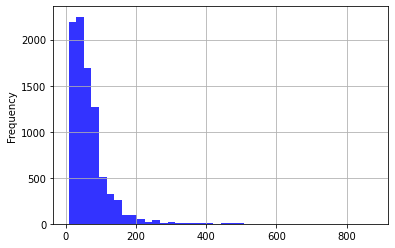

In [60]:
df_train["Price"].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
plt.show()

In [61]:
len(df_train[df_train["Price"] > 350])

51

Vemos que tan sólo hay 52 filas con precios mayores de 350 € que es aproximadamente un 0,5 % del dataset, por tanto vamos a considerarlos outliers y vamos a eliminarlos.

In [62]:
df_train.drop(df_train[df_train['Price']>350].index, inplace = True)
df_train.shape

(8825, 32)

El Zipcode aunque son números la codificamos porque que un código postal sea mayor o menor no quiere decir nada para el modelo.

In [63]:
# Los datos faltantes en ZipCode los rellenamos con unknown
df_train['Zipcode'] = df_train['Zipcode'].fillna('unknown')

In [64]:
# Los datos faltantes en Host Response Time	 los rellenamos con unknown
df_train['Host Response Time'] = df_train['Host Response Time'].fillna('unknown')

In [65]:
# Creamos una lista con los nombres de las variables categóricas
categorical_feature_mask = df_train.dtypes==object
categorical_cols = df_train.columns[categorical_feature_mask].tolist()
# Eliminamos la el elemento Thumbnail Url porque no lo queremos categorizar
categorical_cols.remove("Thumbnail Url")
categorical_cols

['Host Response Time',
 'Neighbourhood',
 'Zipcode',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

Vamos a usar un mean encoder cada codificar las variables categóricas. Y guardamos un diccionario para luego rellenar con los mismos valores los datasets de validation y test.

In [66]:
mean_map = {}
for c in categorical_cols:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean

In [67]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,8825.0,63.651671,4.440131,54.145322,65.188679,66.176409,66.176409,66.176409
Host Response Rate,8825.0,95.097656,13.758471,0.000000,95.089750,100.000000,100.000000,100.000000
Host Verifications,8825.0,4.107309,1.281599,1.000000,3.000000,4.000000,5.000000,10.000000
Neighbourhood,8825.0,63.651671,16.697695,17.000000,53.906780,64.865385,76.394068,180.000000
Zipcode,8825.0,63.651671,14.359220,19.000000,58.666667,65.684549,69.816844,250.000000
Latitude,8825.0,40.420496,0.019919,40.332953,40.409980,40.418580,40.427598,40.514125
Longitude,8825.0,-3.696958,0.023383,-3.822403,-3.707770,-3.701598,-3.693818,-3.573613
Property Type,8825.0,63.651671,6.338729,17.000000,65.781696,65.781696,65.781696,142.500000
Room Type,8825.0,63.651671,24.723545,31.861789,33.123292,83.642054,83.642054,83.642054
Accommodates,8825.0,3.156487,1.917936,1.000000,2.000000,2.000000,4.000000,16.000000


Ya tenemos el dataset de train con todas las variables númericas y sin na.

Vemos que la columna Thumbnail Url está sin categorizar. La vamos a usar para obtener las imágenes.

In [68]:
df_train["Thumbnail Url"]

6880     https://a0.muscache.com/im/pictures/4dfce1cc-a...
4351     https://a0.muscache.com/im/pictures/cdf1e49e-4...
13333    https://a0.muscache.com/im/pictures/edf05f7f-2...
5079                                                   NaN
4033                                                   NaN
                               ...                        
9690     https://a0.muscache.com/im/pictures/900a01e0-f...
13066                                                  NaN
1749     https://a0.muscache.com/im/pictures/11446733/4...
4720     https://a0.muscache.com/im/pictures/10948468/0...
8925     https://a0.muscache.com/im/pictures/d82548e1-f...
Name: Thumbnail Url, Length: 8825, dtype: object

In [69]:
# aquí creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
images_paths = [[i, img_url] for i, img_url in enumerate(df_train['Thumbnail Url'])]

In [70]:
# vamos a ver cómo ha quedado
images_paths[:5]

[[0,
  'https://a0.muscache.com/im/pictures/4dfce1cc-a389-4ad8-bf35-fa711065e37f.jpg?aki_policy=small'],
 [1,
  'https://a0.muscache.com/im/pictures/cdf1e49e-4421-4034-972f-709d34416018.jpg?aki_policy=small'],
 [2,
  'https://a0.muscache.com/im/pictures/edf05f7f-2b53-47e2-84fd-e7f58a5f8d3a.jpg?aki_policy=small'],
 [3, nan],
 [4, nan]]

In [71]:
import imageio as io
import cv2

# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
# ponemos el size de la imagen a 64 para no tener problemas de RAM
def get_image(data_url, target_size=(64, 64)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [72]:
import numpy as np

# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images = np.zeros((len(images_paths), 64, 64, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded = np.zeros(len(images_paths))

In [73]:
print(loaded_images.shape)

(8825, 64, 64, 3)


In [74]:
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 8825/8825 [08:44<00:00, 16.82it/s]

Terminado!
Total de imágenes recuperadas correctamente: 7125.0/8825


Nos quedamos con las filas del dataframe que tienen imágenes y borramos la columna Thumbnail URL que ya no hace falta.

In [75]:
df_train = df_train[was_loaded == 1]
df_train.drop(['Thumbnail Url'], axis=1, inplace=True)
df_train.shape

(7125, 31)

Ahora tenemos que quedarnos sólo con las 7155 imágenes válidas.

In [76]:
loaded_images.shape

(8825, 64, 64, 3)

In [77]:
# Preparamos un array con las dimenciones adecuadas
x_train_img = np.zeros((int(was_loaded.sum()), 64, 64, 3), dtype=np.uint8)
x_train_img.shape

(7125, 64, 64, 3)

In [78]:
# Rellenamos el array con las imágenes válidas
cont = 0
for i, x in enumerate(was_loaded):
  if x > 0:
    x_train_img[cont] = loaded_images[i]
    cont += 1

In [79]:
# borramos el array inicial de imágenes para liberar RAM
del loaded_images 

In [80]:
# normalizamos las imágenes
x_train_img = x_train_img / 255.0

In [81]:
x_train_img.shape

(7125, 64, 64, 3)

In [82]:
# Guardamos los precios para regresión
y_train_reg = np.array(df_train['Price'])
y_train_reg.shape

(7125,)

Vamos a crear una variable de clasificación del precio, en tres grupos, barato, medio y caro.

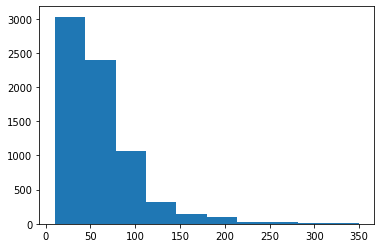

In [83]:
import matplotlib.pyplot as plt
plt.hist(y_train_reg, bins=10)
plt.show()

In [84]:
# Creamos las clases
y_train_class = []
for x in y_train_reg:
    if x <= 40:
        y_train_class.append(0)
    elif x <=75:
        y_train_class.append(1)
    else:
        y_train_class.append(2)

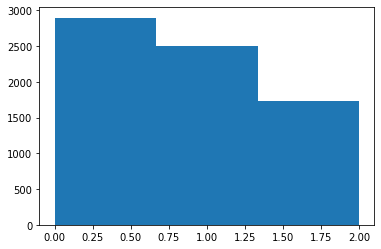

In [85]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_train_class, bins=3)
plt.show()

Parace que ha quedado bastante balanceado.

In [86]:
# Convertirmos el valor en un onehotencoder
for i, y in enumerate(y_train_class):
  if y == 0:
    y_train_class[i] = np.array([1,0,0])
  elif y == 1:
    y_train_class[i] = np.array([0,1,0])
  else:
    y_train_class[i] = np.array([0,0,1])

# Casteamos la lista en un array de numpy
y_train_class = np.array(y_train_class)

In [87]:
y_train_class.shape

(7125, 3)

In [88]:
# Escalamos la variable de precios para regresión
max_price = y_train_reg.max()
y_train_reg = y_train_reg / max_price

In [89]:
y_train_reg.shape

(7125,)

Ya podemos borrar la variable Price del dataframe.

In [90]:
df_train.drop(['Price'], axis=1, inplace=True)
df_train.shape

(7125, 30)

Nos quedamos con los datos numéricos del dataframe.

In [91]:
x_train_num = df_train.values
x_train_num.shape

(7125, 30)

In [92]:
# Borramos el dataframe de train para evitar errores
del df_train

Ya tenemos todos los datos de train listos. Vamos a guardarlos en Drive para no tener que repetir el proceso mas veces.

In [93]:
# guardamos los datos
np.save('x_train_img.npy', x_train_img)
np.save('x_train_num.npy', x_train_num)
np.save('y_train_reg.npy', y_train_reg)
np.save('y_train_class.npy', y_train_class)

In [94]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [95]:
# almacenamos los datos en nuestro Drive
!cp x_train_img.npy /content/drive/My\ Drive/x_train_img.npy
!cp x_train_num.npy /content/drive/My\ Drive/x_train_num.npy
!cp y_train_reg.npy /content/drive/My\ Drive/y_train_reg.npy
!cp y_train_class.npy /content/drive/My\ Drive/y_train_class.npy

Ahora tendremos que hacer lo mismo con los dataframes de test y validación. Empezaremos con el de validación:

In [96]:
# Borramos las columnas que hemos razonado anteriormente.
df_validation.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 
    ], 
    axis=1, inplace=True)

# En la columna host verification nos quedamos con el número de verificaciones del anfitrión
df_validation['Host Verifications'] = df_validation['Host Verifications'].apply(lambda x: len(str(x).split(",")))

# Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed
df_validation['Neighbourhood'] = df_validation['Neighbourhood'].fillna(df_validation['Neighbourhood Cleansed'])

# Eliminamos la columna Neighbourhood Cleansed que ya no nos hace falta
df_validation.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

# En la columna Amenities nos quedamos con el número de comodidades del inmueble
df_validation['Amenities'] = df_validation['Amenities'].apply(lambda x: len(str(x).split(",")))

# En la columna Features nos quedamos con el número de caractarísticas del inmueble
df_validation['Features'] = df_validation['Features'].apply(lambda x: len(str(x).split(",")))

# Nos quedamos con los inmuebles de Madrid
df_validation = df_validation[df_validation['City'] == "Madrid"]

# Eliminamos la columna City que ya no nos hace falta
df_validation.drop(['City'], axis=1, inplace=True)

In [97]:
df_validation.drop(['Square Feet', 'Weekly Price', 'Monthly Price'], axis=1, inplace=True)

In [98]:
df_validation['Security Deposit'] = df_validation['Security Deposit'].fillna(value=0)
df_validation['Cleaning Fee'] = df_validation['Cleaning Fee'].fillna(value=0)

In [99]:
df_validation['Bathrooms'] = df_validation['Bathrooms'].fillna(value=1)

In [100]:
df_validation.drop(df_validation[df_validation['Bedrooms'].isnull()].index, inplace = True)

In [101]:
df_validation['Beds'] = df_validation['Beds'].fillna(df_validation['Bedrooms'])

In [102]:
df_validation.drop(df_validation[df_validation['Price'].isnull()].index, inplace = True)

In [103]:
df_validation["Host Response Rate"].fillna(mean_host_resp, inplace=True)

In [104]:
df_validation['Review Scores Rating'] = df_validation['Review Scores Rating'].fillna(value=0)

In [105]:
df_validation.drop(df_validation[df_validation['Price']>350].index, inplace = True)

In [106]:
# Los datos faltantes en ZipCode los rellenamos con unknown
df_validation['Zipcode'] = df_validation['Zipcode'].fillna('unknown')

In [107]:
# Los datos faltantes en Host Response Time	 los rellenamos con unknown
df_validation['Host Response Time'] = df_validation['Host Response Time'].fillna('unknown')

In [108]:
# En test, categorizamos con los datos de train
categorical_feature_mask = df_validation.dtypes==object
categorical_cols = df_validation.columns[categorical_feature_mask].tolist()
# Eliminamos la el elemento Thumbnail Url porque no lo queremos categorizar
categorical_cols.remove("Thumbnail Url")
for c in categorical_cols:
    df_validation[c] = df_validation[c].map(mean_map[c])

In [109]:
df_validation.isnull().any()

Thumbnail Url                      True
Host Response Time                False
Host Response Rate                False
Host Verifications                False
Neighbourhood                     False
Zipcode                            True
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                             False
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Availability 30                   False
Availability 60                   False


In [110]:
df_validation['Zipcode'].isnull().sum()

1

In [111]:
df_validation.drop(df_validation[df_validation['Zipcode'].isnull()].index, inplace = True)

In [112]:
images_paths = [[i, img_url] for i, img_url in enumerate(df_validation['Thumbnail Url'])]

In [113]:
loaded_images = np.zeros((len(images_paths), 64, 64, 3), dtype=np.uint8)
was_loaded = np.zeros(len(images_paths))

In [114]:
print(loaded_images.shape)

(987, 64, 64, 3)


In [115]:
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 987/987 [01:05<00:00, 15.08it/s]

Terminado!
Total de imágenes recuperadas correctamente: 814.0/987


In [116]:
df_validation = df_validation[was_loaded == 1]
df_validation.drop(['Thumbnail Url'], axis=1, inplace=True)
df_validation.shape

(814, 31)

In [117]:
x_val_img = np.zeros((int(was_loaded.sum()), 64, 64, 3), dtype=np.uint8)

In [118]:
x_val_img.shape

(814, 64, 64, 3)

In [119]:
# Rellenamos el array con las imágenes válidas
cont = 0
for i, x in enumerate(was_loaded):
  if x > 0:
    x_val_img[cont] = loaded_images[i]
    cont += 1

In [120]:
# borramos el array inicial de imágenes para liberar RAM
del loaded_images 
# normalizamos las imágenes
x_val_img = x_val_img / 255.0
x_val_img.shape

(814, 64, 64, 3)

In [121]:
# Guardamos los precios para regresión
y_val_reg = np.array(df_validation['Price'])
y_val_reg.shape

(814,)

In [122]:
# Creamos las clases
y_val_class = []
for x in y_val_reg:
    if x <= 40:
        y_val_class.append(0)
    elif x <=75:
        y_val_class.append(1)
    else:
        y_val_class.append(2)

# Convertirmos el valor en un onehotencoder
for i, y in enumerate(y_val_class):
  if y == 0:
    y_val_class[i] = np.array([1,0,0])
  elif y == 1:
    y_val_class[i] = np.array([0,1,0])
  else:
    y_val_class[i] = np.array([0,0,1])

# Casteamos la lista en un array de numpy
y_val_class = np.array(y_val_class)

y_val_class.shape

(814, 3)

In [123]:
# Escalamos la variable de precios para regresión
y_val_reg = y_val_reg / max_price

In [124]:
y_val_reg.shape

(814,)

In [125]:
df_validation.drop(['Price'], axis=1, inplace=True)
df_validation.shape

(814, 30)

In [126]:
x_val_num = df_validation.values
del df_validation
x_val_num.shape

(814, 30)

In [127]:
# guardamos los datos
np.save('x_val_img.npy', x_val_img)
np.save('x_val_num.npy', x_val_num)
np.save('y_val_reg.npy', y_val_reg)
np.save('y_val_class.npy', y_val_class)

In [128]:
# almacenamos los datos en nuestro Drive
!cp x_val_img.npy /content/drive/My\ Drive/x_val_img.npy
!cp x_val_num.npy /content/drive/My\ Drive/x_val_num.npy
!cp y_val_reg.npy /content/drive/My\ Drive/y_val_reg.npy
!cp y_val_class.npy /content/drive/My\ Drive/y_val_class.npy

Vamos a realizar los mismo con los datos de test.

In [129]:
# Borramos las columnas que hemos razonado anteriormente.
df_test.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 
    ], 
    axis=1, inplace=True)

# En la columna host verification nos quedamos con el número de verificaciones del anfitrión
df_test['Host Verifications'] = df_test['Host Verifications'].apply(lambda x: len(str(x).split(",")))

# Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed
df_test['Neighbourhood'] = df_test['Neighbourhood'].fillna(df_test['Neighbourhood Cleansed'])

# Eliminamos la columna Neighbourhood Cleansed que ya no nos hace falta
df_test.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

# En la columna Amenities nos quedamos con el número de comodidades del inmueble
df_test['Amenities'] = df_test['Amenities'].apply(lambda x: len(str(x).split(",")))

# En la columna Features nos quedamos con el número de caractarísticas del inmueble
df_test['Features'] = df_test['Features'].apply(lambda x: len(str(x).split(",")))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [130]:
# Nos quedamos con los inmuebles de Madrid
df_test = df_test[df_test['City'] == "Madrid"]

# Eliminamos la columna City que ya no nos hace falta
df_test.drop(['City'], axis=1, inplace=True)

In [131]:
df_test.drop(['Square Feet', 'Weekly Price', 'Monthly Price'], axis=1, inplace=True)

In [132]:
df_test['Security Deposit'] = df_test['Security Deposit'].fillna(value=0)
df_test['Cleaning Fee'] = df_test['Cleaning Fee'].fillna(value=0)

In [133]:
df_test['Bathrooms'] = df_test['Bathrooms'].fillna(value=1)

In [134]:
df_test.drop(df_test[df_test['Bedrooms'].isnull()].index, inplace = True)

In [135]:
df_test['Beds'] = df_test['Beds'].fillna(df_test['Bedrooms'])

In [136]:
df_test.drop(df_test[df_test['Price'].isnull()].index, inplace = True)

In [137]:
df_test["Host Response Rate"].fillna(mean_host_resp, inplace=True)

In [138]:
df_test['Review Scores Rating'] = df_test['Review Scores Rating'].fillna(value=0)

In [139]:
df_test.drop(df_test[df_test['Price']>350].index, inplace = True)

In [140]:
# Los datos faltantes en ZipCode los rellenamos con unknown
df_test['Zipcode'] = df_test['Zipcode'].fillna('unknown')

In [141]:
# Los datos faltantes en Host Response Time	 los rellenamos con unknown
df_test['Host Response Time'] = df_test['Host Response Time'].fillna('unknown')

In [142]:
# En test, categorizamos con los datos de train
categorical_feature_mask = df_test.dtypes==object
categorical_cols = df_test.columns[categorical_feature_mask].tolist()
# Eliminamos la el elemento Thumbnail Url porque no lo queremos categorizar
categorical_cols.remove("Thumbnail Url")
for c in categorical_cols:
    df_test[c] = df_test[c].map(mean_map[c])

In [143]:
df_test.isnull().any()

Thumbnail Url                      True
Host Response Time                False
Host Response Rate                False
Host Verifications                False
Neighbourhood                      True
Zipcode                            True
Latitude                          False
Longitude                         False
Property Type                      True
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                             False
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Availability 30                   False
Availability 60                   False


In [144]:
df_test['Neighbourhood'].isnull().sum()

1

In [145]:
df_test['Zipcode'].isnull().sum()

5

In [146]:
df_test['Property Type'].isnull().sum()

4

In [147]:
df_test.drop(df_test[df_test['Neighbourhood'].isnull()].index, inplace = True)
df_test.drop(df_test[df_test['Zipcode'].isnull()].index, inplace = True)
df_test.drop(df_test[df_test['Property Type'].isnull()].index, inplace = True)

In [148]:
images_paths = [[i, img_url] for i, img_url in enumerate(df_test['Thumbnail Url'])]

In [149]:
loaded_images = np.zeros((len(images_paths), 64, 64, 3), dtype=np.uint8)
was_loaded = np.zeros(len(images_paths))

In [150]:
print(loaded_images.shape)

(3279, 64, 64, 3)


In [151]:
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 3279/3279 [03:27<00:00, 15.79it/s]

Terminado!
Total de imágenes recuperadas correctamente: 2687.0/3279


In [152]:
df_test = df_test[was_loaded == 1]
df_test.drop(['Thumbnail Url'], axis=1, inplace=True)
df_test.shape

(2687, 31)

In [153]:
x_test_img = np.zeros((int(was_loaded.sum()), 64, 64, 3), dtype=np.uint8)
x_test_img.shape

(2687, 64, 64, 3)

In [154]:
# Rellenamos el array con las imágenes válidas
cont = 0
for i, x in enumerate(was_loaded):
  if x > 0:
    x_test_img[cont] = loaded_images[i]
    cont += 1

In [155]:
# borramos el array inicial de imágenes para liberar RAM
del loaded_images 

In [156]:
# normalizamos las imágenes
x_test_img = x_test_img / 255.0
x_test_img.shape

(2687, 64, 64, 3)

In [157]:
# Guardamos los precios para regresión
y_test_reg = np.array(df_test['Price'])
y_test_reg.shape

(2687,)

In [158]:
# Creamos las clases
y_test_class = []
for x in y_test_reg:
    if x <= 40:
        y_test_class.append(0)
    elif x <=75:
        y_test_class.append(1)
    else:
        y_test_class.append(2)

# Convertirmos el valor en un onehotencoder
for i, y in enumerate(y_test_class):
  if y == 0:
    y_test_class[i] = np.array([1,0,0])
  elif y == 1:
    y_test_class[i] = np.array([0,1,0])
  else:
    y_test_class[i] = np.array([0,0,1])

# Casteamos la lista en un array de numpy
y_test_class = np.array(y_test_class)

y_test_class.shape

(2687, 3)

In [159]:
# Escalamos la variable de precios para regresión
y_test_reg = y_test_reg / max_price

In [160]:
y_test_reg.shape

(2687,)

In [161]:
df_test.drop(['Price'], axis=1, inplace=True)
df_test.shape

(2687, 30)

In [162]:
x_test_num = df_test.values
del df_test
x_test_num.shape

(2687, 30)

In [163]:
# guardamos los datos
np.save('x_test_img.npy', x_test_img)
np.save('x_test_num.npy', x_test_num)
np.save('y_test_reg.npy', y_test_reg)
np.save('y_test_class.npy', y_test_class)

In [164]:
# almacenamos los datos en nuestro Drive
!cp x_test_img.npy /content/drive/My\ Drive/x_test_img.npy
!cp x_test_num.npy /content/drive/My\ Drive/x_test_num.npy
!cp y_test_reg.npy /content/drive/My\ Drive/y_test_reg.npy
!cp y_test_class.npy /content/drive/My\ Drive/y_test_class.npy

Por fin tenemos todos los datos listos para cargarlos en nuestros modelos.